In [1]:
from lutz_munge import parse_lutz
import matplotlib.pyplot as plt
import collections
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import FreqDist
from nltk import Text
import pprint
%matplotlib inline

In [2]:
# Extract the articles from the http documents
lutz_books = parse_lutz()

In [3]:
# Create the stopword list
swords = stopwords.words('english')
swords.extend(string.punctuation)
swords.extend(['edition','page','1983', 'current', 'may', 'would', 'upon', 'one', 'every',
              'us', 'must'])

In [4]:
# Let's first find the years and location.
year = {}
location = {}
content = ''
for article in lutz_books:
    tmp_year = article.year.strip()
    tmp_location = article.location.lower().strip()
    content = content + article.content
    if year.get(tmp_year) != None:
        year[tmp_year] = year[tmp_year] + 1
    else:
        year[tmp_year] = 1

    if location.get(tmp_location) != None:
        location[tmp_location] = location[tmp_location] + 1
    else:
        location[tmp_location] = 1

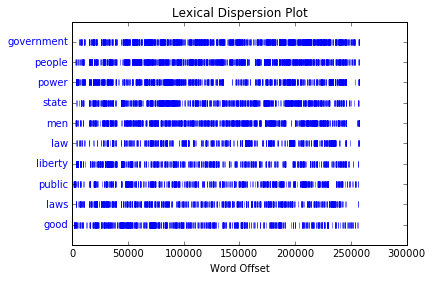

In [5]:
    # Generate stopwords from the content.
    # Tokenize the content.
    tokens = word_tokenize(content)
    # Filter the content based on the stopwords.
    content = [w for w in tokens if w.lower() not in swords]
    # Calculate the frequency distribution and display the dispertion plot.
    fdist = FreqDist(content)
    text = Text(content)
    text.dispersion_plot([x[0] for x in fdist.most_common(10)])

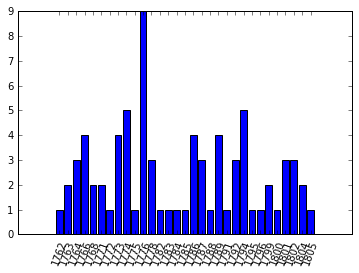

In [6]:
sorted_year = collections.OrderedDict(sorted(year.items(), key=lambda t: t[0]))
#for current_year in sorted_year:
#    print(current_year + ":" + str(sorted_year[current_year]))
plt.bar(range(len(year)), sorted_year.values(), align='center')
plt.xticks(rotation=70)
plt.xticks(range(len(sorted_year)), sorted_year.keys())
plt.show()

The years span is a pretty good representation of the founding era which is about 1760 to about 1800 with the most number of articles in a given year taken from 1776. 

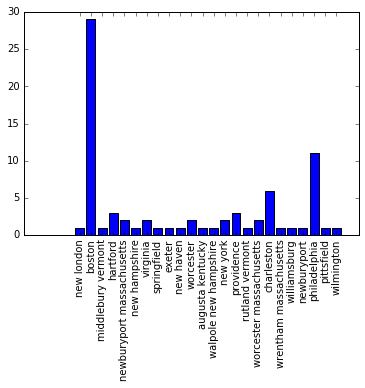

In [7]:
#for current_location in sorted(location):
#    print(current_location + ":" + str(location[current_location]))
plt.bar(range(len(location)), location.values(), align='center')
plt.xticks(rotation=90)
plt.xticks(range(len(location)), location.keys())
plt.show()

The data would seem to suggest that the articles are most representative of the Massachusetts area.